<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-relevant-python-packages" data-toc-modified-id="Import-relevant-python-packages-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Import relevant python packages</a></span></li><li><span><a href="#$G_0$-for-topological-insulator" data-toc-modified-id="$G_0$-for-topological-insulator-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>$G_0$ for topological insulator</a></span></li><li><span><a href="#$\langle-r-|V|-r^{'}-\rangle$--ellipse" data-toc-modified-id="$\langle-r-|V|-r^{'}-\rangle$--ellipse-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>$\langle r |V| r^{'} \rangle$  ellipse</a></span></li><li><span><a href="#$G=(\mathbb{1}--G_0V)^{-1}G_0$" data-toc-modified-id="$G=(\mathbb{1}--G_0V)^{-1}G_0$-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>$G=(\mathbb{1} -G_0V)^{-1}G_0$</a></span></li><li><span><a href="#LDOS-$\rho(r)=\frac{-1}{\pi}Im-G(r,r)$" data-toc-modified-id="LDOS-$\rho(r)=\frac{-1}{\pi}Im-G(r,r)$-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LDOS $\rho(r)=\frac{-1}{\pi}Im G(r,r)$</a></span></li></ul></div>

# Import relevant python packages

In [1]:
import numpy as np #Numerical package for arrays, algebra...
%pylab notebook 
from mpl_toolkits.mplot3d import Axes3D #generate 3D plots
from scipy.special import j0,y0, j1, y1 #0th and 1st order Bessel function of first and second kind
import scipy as sp
import time

Populating the interactive namespace from numpy and matplotlib


# $G_0$ for topological insulator 
$G_0(r-r^{'},\omega)=\frac{|\omega|}{4\hbar^2 {v_f}^2}[f_0(\omega,\rho)\sigma_0 + f_1(\omega,\rho) \vec{\sigma}\cdot\vec{\rho}]$ <br> 
$f_0(\omega,\rho)=sgn(\omega) Y_0(\zeta)-iJ_0(\zeta)\Theta(1-\frac{|\omega|}{\Lambda})$
<br>
$f_1(\omega,\rho)=iY_1(\zeta)+sgn(\omega) J_1(\zeta)\Theta(1-\frac{|\omega|}{\Lambda})$
<br>
$\vec{\rho}=\vec{r}-\vec{r'}~~;~~\zeta=\frac{|\omega|\rho}{\hbar v_f}$

\begin{equation*}
\sigma_x =\begin{pmatrix}
0 & 1 \\ 1 & 0
\end{pmatrix} ~~;~~ 
\sigma_y =\begin{pmatrix}
0 & -i \\ i & 0
\end{pmatrix}
~~;~~ 
\sigma_z =\begin{pmatrix}
1 & 0 \\ 0 & -1
\end{pmatrix}
~~;~~ 
\sigma_0 =\begin{pmatrix}
1 & 0 \\ 0 & 1
\end{pmatrix}
\end{equation*}


In [2]:
sigma0 = np.array([[1,0],[0,1]],dtype=np.complex64)
sigmax = np.array([[0,1],[1,0]],dtype=np.complex64)
sigmay = np.array([[0,np.complex(0,-1)],[np.complex(0,1),0]],dtype=np.complex64)
sigmaz = np.array([[1,0],[0,-1]],dtype=np.complex64)

In [35]:
npix=40
hbar=1.
cutoff=5.
eps=1e-8
def return_G0(x_tip,y_tip,omega=0.005,vf=1.,rmask=2,do_vis=False): 
    f0=np.zeros((npix,npix),dtype=np.complex)
    f1=np.zeros((npix,npix),dtype=np.complex)
    x,y=np.indices(f0.shape) 
    r=eps+np.sqrt((x-x_tip)**2.+(y-y_tip)**2.) ; mask=(r>rmask)
    
    xi=abs(omega)*r/(hbar*vf)
    norm=abs(omega)/(4*(hbar**2.)*(vf**2.))
    
    f0=np.multiply(norm*(sign(omega)*y0(xi)-1j*j0(xi)*heaviside(1-(abs(omega)/cutoff), 1)),mask)
    f1=np.multiply(norm*(1j*y1(xi)+sign(omega)*j1(xi)*heaviside(1-(abs(omega)/cutoff), 1)),mask)
    
    
    limG0=-norm*((sign(omega)/np.pi)*np.log(abs((cutoff/omega)**2.-1.)) + 1.j*heaviside(1-(abs(omega)/cutoff), 1))
    
    if do_vis:
        G0=np.kron(f0,sigma0)
        G0=G0+np.kron(np.multiply((x-x_tip),f1),sigmax)
        G0=G0+np.kron(np.multiply((y-y_tip),f1),sigmay)
        
        G0=G0+np.kron((limG0*(1-mask)),sigma0)
    else:
        G0=np.kron(f0.ravel(),sigma0)
        G0=G0+np.kron(np.multiply((x-x_tip),f1).ravel(),sigmax)
        G0=G0+np.kron(np.multiply((y-y_tip),f1).ravel(),sigmay)
    
        G0=G0+np.kron((limG0*(1-mask)).ravel(),sigma0)
    return G0

G0all=np.zeros((2*npix**2,2*npix**2),dtype=np.complex)
s=0
for itip in range(npix):
    for jtip in range(npix):
        G0all[:,s:s+2]=(return_G0(x_tip=itip,y_tip=jtip).T)
        s=s+2

<IPython.core.display.Javascript object>


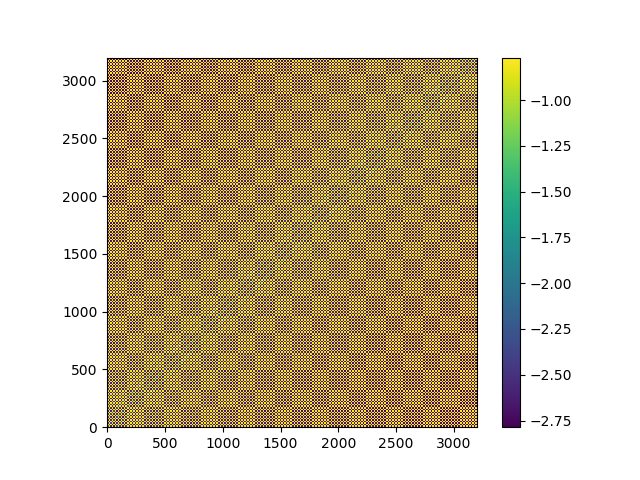

/Users/garima/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [36]:
# G0=return_G0(11,11,omega=4.9,do_vis=True)

figure()
imshow(log10(abs(G0all)),origin="lower")
colorbar()

# $\langle r |V| r^{'} \rangle$  ellipse 

<IPython.core.display.Javascript object>


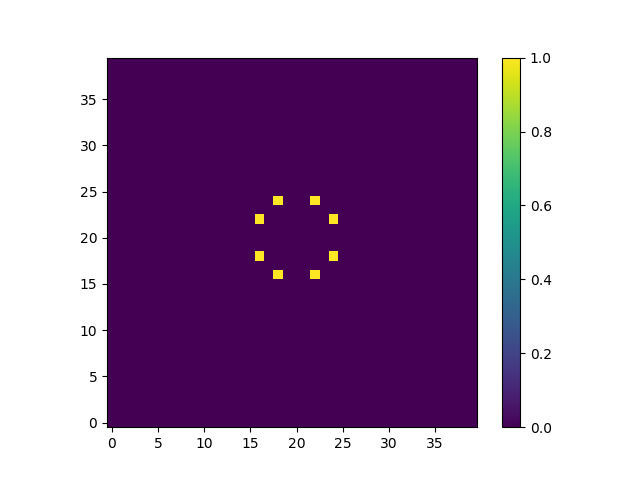

In [37]:
V=np.zeros((npix,npix),dtype=np.complex)
for i in range(npix):
    for j in range(npix):
        radius=(i-npix/2)**2/2 + (j-npix/2)**2/2
        if radius >= 10 and radius <=10:
            V[i,j]=1.

figure()
imshow(real(V),origin="lower")
colorbar()
        
Vall=np.kron(diag(V.ravel()),sigma0)
# figure()
# imshow(real(Vall),origin="lower")
# colorbar()

# $G=(\mathbb{1} -G_0V)^{-1}G_0$

In [38]:
I0=identity(2*npix**2,dtype=np.complex)
# G0V=np.matmul(G0all,Vall)
G0V=np.einsum("ij,jj->ij",G0all,Vall)
Gnew=np.linalg.solve(I0-G0V,G0all)

# LDOS $\rho(r)=\frac{-1}{\pi}Im G(r,r)$

In [44]:
a=[2,3]
if a:
    print "hello"
else:
    print "bye"

hello


In [39]:
ndos=-1*imag((np.diagonal(Gnew)[1::2] + np.diagonal(Gnew)[::2]).reshape(npix,npix))

<IPython.core.display.Javascript object>


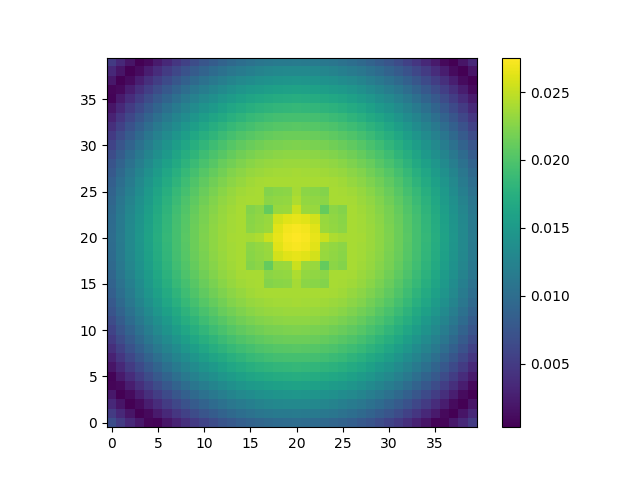

In [40]:
figure()
imshow(abs(ndos),origin="lower")
colorbar()

In [41]:
# vec=np.append([1.,1.],np.zeros(2*npix*npix-2))
# O=(sp.linalg.circulant(vec))[:npix**2,:]
# ndos=-1*imag(np.matmul(O,np.diagonal(Gnew))).reshape(npix,npix)
dos=-1*imag((np.diagonal(Gnew)[1::2] + np.diagonal(Gnew)[::2]).reshape(npix,npix))

O=np.kron(np.identity(npix*npix),(1+sigmax)/2.)
temp_Gnew=np.matmul(Gnew,O)
sdos_xp=-1*imag((np.diagonal(temp_Gnew)[1::2] + np.diagonal(temp_Gnew)[::2]).reshape(npix,npix))

# O=np.kron(np.identity(npix*npix),(1+sigmay)/2.)
# temp_Gnew=np.matmul(Gnew,O)
# sdos_yp=-1*imag((np.diagonal(temp_Gnew)[1::2] + np.diagonal(temp_Gnew)[::2]).reshape(npix,npix))

# O=np.kron(np.identity(npix*npix),(1+sigmaz)/2.)
# temp_Gnew=np.matmul(Gnew,O)
# sdos_zp=-1*imag((np.diagonal(temp_Gnew)[1::2] + np.diagonal(temp_Gnew)[::2]).reshape(npix,npix))

# O=np.kron(np.identity(npix*npix),(1-sigmax)/2.)
# temp_Gnew=np.matmul(Gnew,O)
# sdos_xm=-1*imag((np.diagonal(temp_Gnew)[1::2] + np.diagonal(temp_Gnew)[::2]).reshape(npix,npix))

# O=np.kron(np.identity(npix*npix),(1-sigmay)/2.)
# temp_Gnew=np.matmul(Gnew,O)
# sdos_ym=-1*imag((np.diagonal(temp_Gnew)[1::2] + np.diagonal(temp_Gnew)[::2]).reshape(npix,npix))

# O=np.kron(np.identity(npix*npix),(1-sigmaz)/2.)
# temp_Gnew=np.matmul(Gnew,O)
# sdos_zm=-1*imag((np.diagonal(temp_Gnew)[1::2] + np.diagonal(temp_Gnew)[::2]).reshape(npix,npix))

<IPython.core.display.Javascript object>


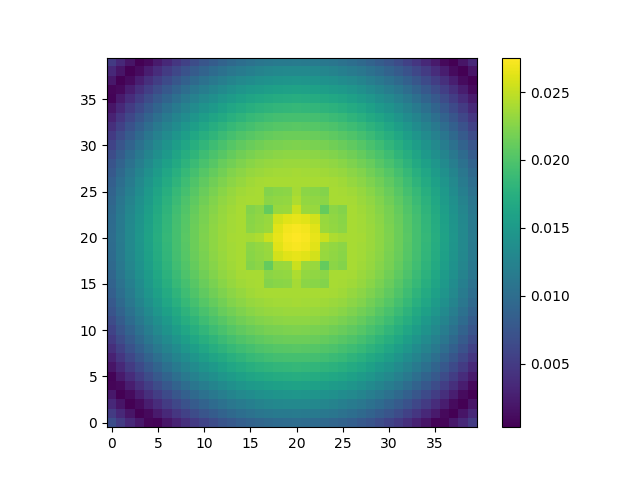

<IPython.core.display.Javascript object>


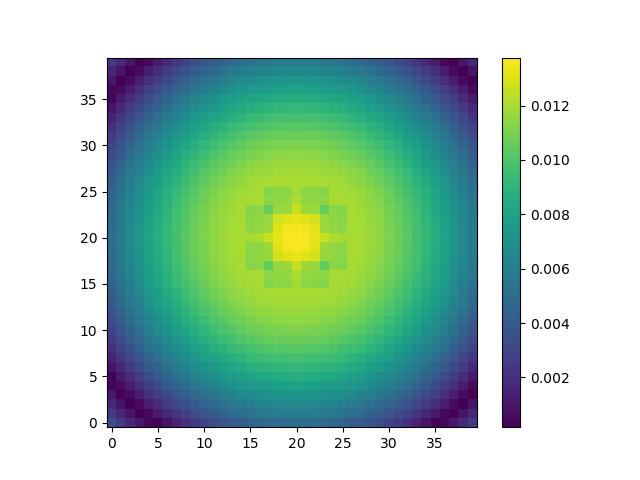

In [42]:
figure()
imshow(abs(dos),origin="lower")
colorbar()

figure()
imshow(abs(sdos_xp),origin="lower")
colorbar()

# figure()
# imshow(abs(sdos_xm),origin="lower")
# colorbar()

# figure()
# imshow(abs(sdos_yp),origin="lower")
# colorbar()

# figure()
# imshow(abs(sdos_ym),origin="lower")
# colorbar()

# figure()
# imshow(abs(sdos_zp),origin="lower")
# colorbar()

# figure()
# imshow(abs(sdos_zm),origin="lower")
# colorbar()